---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-Profiling**](#Section5)<br>
**6.** [**Data Cleaning**](#Section6)<br>
**7.** [**Data Post-Profiling**](#Section7)<br>
**8.** [**Exploratory Data Analysis**](#Section8)<br>
 - **8.1** [**How many males and females are smoker ?**](#Section81)
  - **8.2** [**Smoker Male and Female hospital charges.?**](#Section82)
  - **8.3** [**Age with respect to  charges in hospital?**](#Section83)
  - **8.4** [**Which region Insurance is bearing maximum amount of claims?**](#Section84)
  - **8.5** [**What is Relationship between age and no of childreen ?**](#Section85)
  - **8.6** [**Male & Female Hospital Charges?**](#Section86)
  - **8.7** [**Who Smokes more Father or Mom ?**](#Section87)
  - **8.8** [**What is the average Bmi and overall we have high bmi or low ?**](#Section88)
**9.** [**Summary and Conclusion**](#Section9)<br>
  - **9.1** [**Actionable Insights**](#Section92)

### ---
<a name = Section1></a>
# **1. Introduction**
---
- This data set gives the cost of persons who have taken health insurance
- Data set have 7 features and 1338 records
- Features include weather costumer is smoker or not 
- Age, sex , no of children of person
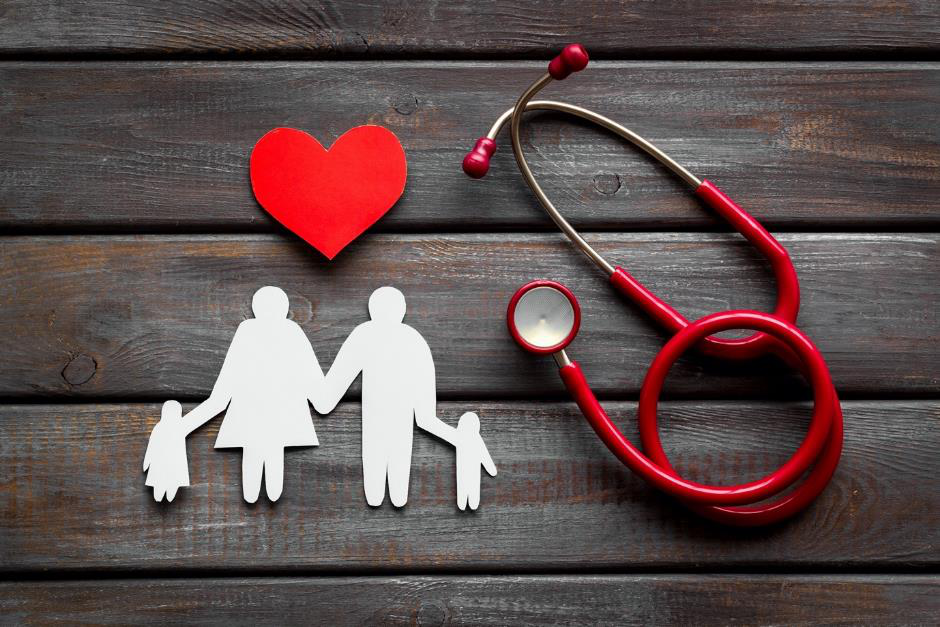


---
<a name = Section2></a>
# **2. Problem Statement**
---

- The main purpose of analyzing the data within this dataset, is to first fully understand what is going on. 
- Weather age is affecting the hospital bills.
- We'll Use this dataset to Visvalise how to decrease the cost beared by insurance company.
- Weather smokers are having more hospital billing cost.
- Provide actionable insights about the data.
- How to reduce the cost of insurence company.
- Providing recommendations based upton age and weather person smokes or not.
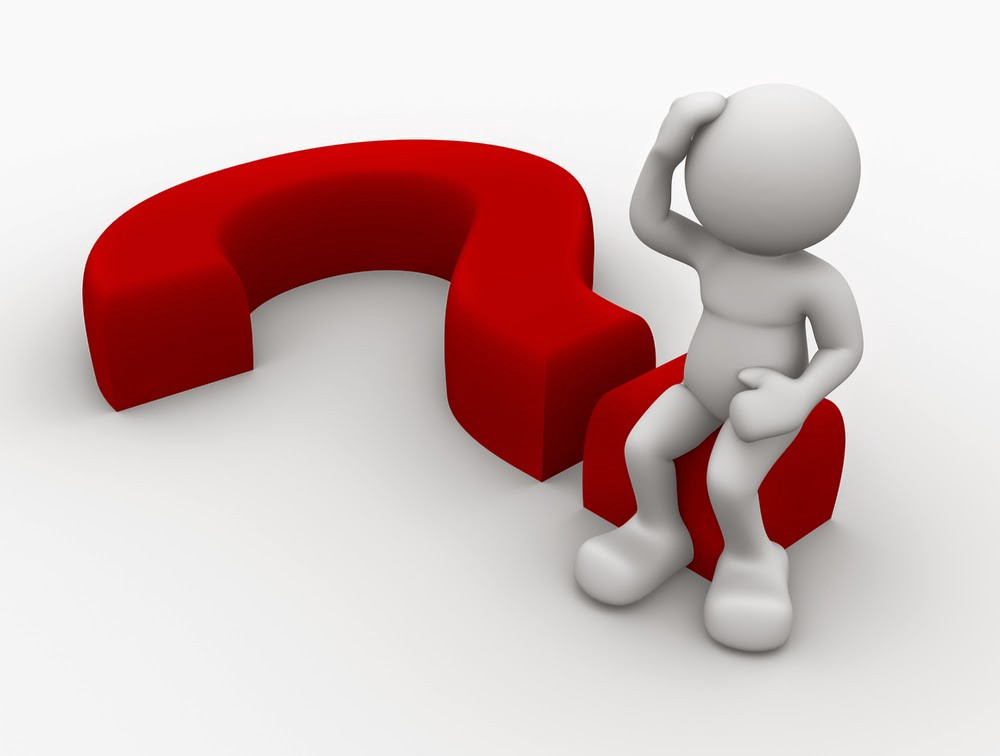

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

- I have comment out the pip install commands as i have already installed those 
- If you don't have these library so just un-comment them 

In [1]:
#!pip install -q datascience                                           
#!pip install opendatasets


In [2]:
#!pip install pandas-profiling==3.2.0
#!pip install visions==0.7.4
#!pip install markupsafe==2.0.1 

<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [3]:
#!pip install -q --upgrade yellowbrick
#!pip install opendatasets --upgrade --quiet            

<a name = Section33></a>
### **3.3 Importing Libraries**

In [4]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
from collections import Counter                                     # For counting hashable objects
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
import numpy as np                                                  # Importing numpy Library for easy mathematical Calculations
%matplotlib inline
import opendatasets as od
from pandas_profiling import ProfileReport
import plotly.graph_objs as go                                      # For Plotly interfaced graphs
import calendar                                                     # For COnverting Months digits to name
import folium
from folium.plugins import HeatMap
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- This dataset is obtained from a survey in 2014.

- It describes the attitudes towards mental health and frequency of mental health disorders in the tech workplace.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 1338  | 7 | 73.3+ KB| 


| Id | Features | Description |
| :-- | :--| :--| 
|01|**Age**| age of primary beneficiary.|
|02|**Sex**|insurance contractor gender, female, male.| 
|03|**Bmi**|Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.|
|04|**Children**| Number of children covered by health insurance / Number of dependents|
|05|**smoker**|Smoking.|
|06|**region**|the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.|
|07|**charges**| Individual medical costs billed by health insurance.|


- **Note:** For easy reference I am  sharing a <a href="https://www.kaggle.com/datasets/mirichoi0218/insurance/download">**link**</a> which you can keep handy while analyzing the data.If opendataset don't work .You can Download DataSet from this Link and then use it to run it from local system drive.

In [5]:
insurance_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
print('Data Shape:', insurance_df.shape)
insurance_df.head()

Data Shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90000,0,yes,southwest,16884.92400
1,18,male,33.77000,1,no,southeast,1725.55230
2,28,male,33.00000,3,no,southeast,4449.46200
3,33,male,22.70500,0,no,northwest,21984.47061
4,32,male,28.88000,0,no,northwest,3866.85520


- The dataset contains **1338** rows and **6** columns. 

<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [6]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.00000,1338.00000,1338.00000,1338.00000
mean,39.20703,30.66340,1.09492,13270.42227
std,14.04996,6.09819,1.20549,12110.01124
min,18.00000,15.96000,0.00000,1121.87390
25%,27.00000,26.29625,0.00000,4740.28715
50%,39.00000,30.40000,1.00000,9382.03300
75%,51.00000,34.69375,2.00000,16639.91251
max,64.00000,53.13000,5.00000,63770.42801


**Observation:**

- The **average** value of **Charges** is **4382**

- The **maximum** value of **Children** is **5**

- The **average** value of **BMI** is **30.4**



In [8]:
insurance_df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [9]:
insurance_df.info(verbose = True, memory_usage = 'deep', null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 286.5 KB


**Observation:**

- There are **no null values present** in this data set.

- **Each feature** seems to have **correct data type**.

<a name = Section5></a>

---
# **5. Data Pre-Profiling**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [10]:
#profile = ProfileReport(df = insurance_df)
#profile.to_file(output_file = 'Pre Profiling Report.html')
#print('Accomplished!')

**Observation:**

- Report show that there are **4 features** which **are numerical**.

- There are **no missing values**.
 

- 0.1% **duplicates** has been found. 

- **Age** and **Smoking** are having **high correlation** with the **Hospital charges** meaning person who are aged and have been smoking have high chances of getting hospitalised and **spend more amount** on hospital bills. 

- For full details checkout the report.

<a name = Section6></a>

---
# **6. Data Cleaning**
---

- In this section, we will perform the **cleaning** operations over the features using information from the previous section.

- We will simply **drop** the **rows** that contain **missing** values.

- We will also change smoker from yes  & No to 1 & 0 Respectively.

In [11]:
insurance_df['smoker'] = insurance_df['smoker'].map({'yes': 1, 'no': 0})

In [12]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


- As we can see now data type of smokers has been changed to int64 type from earlier being object type.
- We Don't have any missing value in our data
- Duplicates are only 0.1% so we can let them as it is because changing them will lead to droping of rows which contain important data


<a name = Section7></a>

---
# **7. Data Post-Profiling**
---

- In this section, we will observe the changes after performing data pre-processing, if present.

In [13]:
null_frame = pd.DataFrame(index = insurance_df.columns.values)
null_frame['Null Frequency'] = insurance_df.isnull().sum().values
percent = insurance_df.isnull().sum().values/insurance_df.shape[0]
null_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
null_frame.transpose()

,age,sex,bmi,children,smoker,region,charges
Null Frequency,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Missing %age,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


- Now we can see that in our data frame we don't have any missing values 
- We can now begin our EDA on this Data.

### Is there a relationship between Various features?

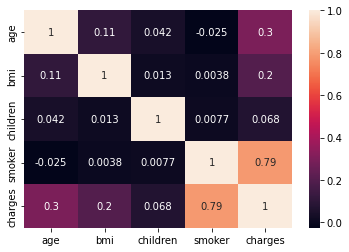

In [14]:
sns.heatmap(insurance_df.corr(), annot=True );

- Smoker is the most important feature we have, as we can see from the heatmap and the smoker analysis section.
- The visualization of the data is so important that even if we don't build our model yet, we can know for sure what is going to effect it or not.

<a name = Section8></a>

---
# **8. Exploratory Data Analysis**
---

<a name = Section81></a>
### **8.1 How many males and females are smoker ?**

In [15]:
insurance_df.groupby(by = 'sex')['smoker'].sum()


sex
female    115
male      159
Name: smoker, dtype: int64

In [16]:
insurance_df["sex"].count()

1338

In [17]:
print(insurance_df['sex'].tolist().count('female'))
print(insurance_df['sex'].tolist().count('male'))

662
676


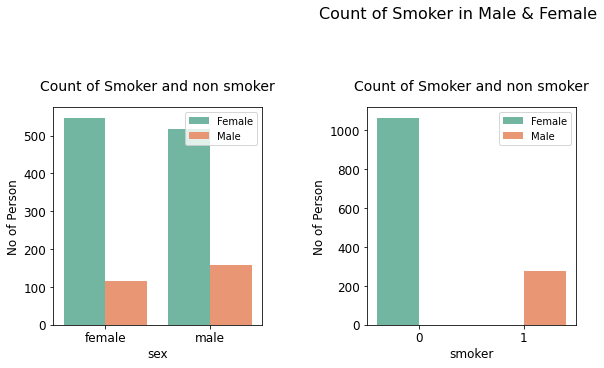

In [18]:
POI_features = ['sex','smoker']

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 10))

plt.subplots_adjust(hspace=0.5,wspace = 0.5)
for i, feature in enumerate(POI_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='smoker', data=insurance_df ,palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('No of Person', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['Female', 'Male'], loc='upper right', prop={'size': 10})
    plt.title('Count of Smoker and non smoker', size=14, y=1.05)
fig.suptitle('Count of Smoker in Male & Female',y=1.02, fontsize=16)
plt.show()

#### Observations
- **Total no of smoker** in Male and Female **combined** are **274 out of 1338**
- **Tota**l of **115 female smoke**r out of 662
- **Total** of **159 Male smoker** out of 676

<a name = Section82></a>
### **8.2  Smoker Male and Female hospital charges.?**

In [19]:
smoker_df = insurance_df[['sex','charges','smoker']]
smoker_df.head()


,sex,charges,smoker
0,female,16884.92400,1
1,male,1725.55230,0
2,male,4449.46200,0
3,male,21984.47061,0
4,male,3866.85520,0


In [20]:
yes = smoker_df.loc[smoker_df['smoker'] == 1]
yes.head()

,sex,charges,smoker
0,female,16884.92400,1
11,female,27808.72510,1
14,male,39611.75770,1
19,male,36837.46700,1
23,female,37701.87680,1


In [21]:
no = smoker_df.loc[smoker_df['smoker'] == 0]
no.head()

,sex,charges,smoker
1,male,1725.55230,0
2,male,4449.46200,0
3,male,21984.47061,0
4,male,3866.85520,0
5,female,3756.62160,0


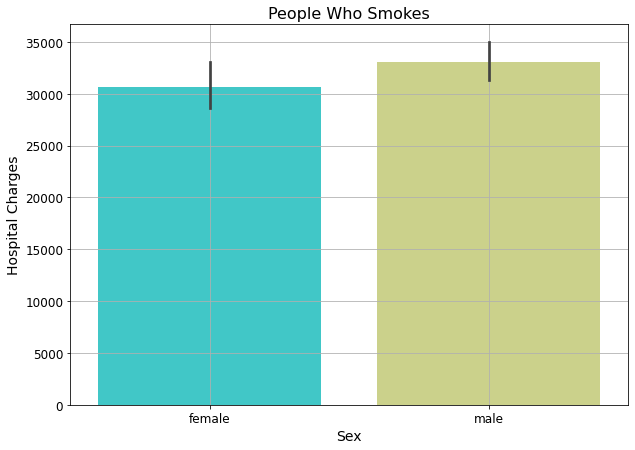

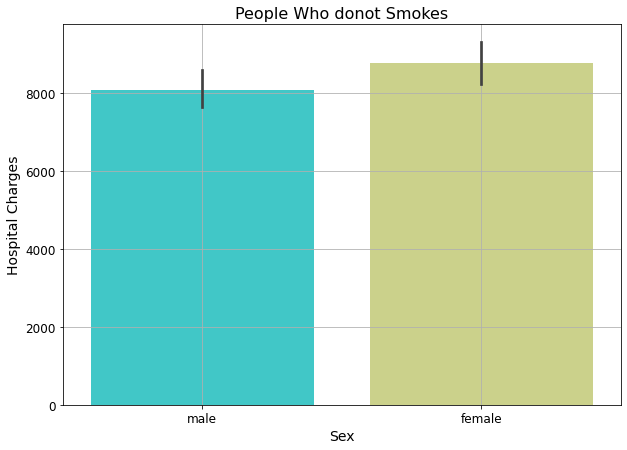

In [22]:
plt.figure(figsize=(10,7))

# Plot a barplot for month vs revenue for the UK
sns.barplot(data=yes, x='sex', y='charges', palette='rainbow')

# Adding some cosmetics
plt.xlabel(xlabel='Sex', fontsize=14)
plt.ylabel(ylabel='Hospital Charges', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(label='People Who Smokes', fontsize=16)
plt.grid(b=True)

# Display the plot
plt.show()

plt.figure(figsize=(10,7))

# Plot a barplot for month vs revenue for the UK
sns.barplot(data=no, x='sex', y='charges', palette='rainbow')

# Adding some cosmetics
plt.xlabel(xlabel='Sex', fontsize=14)
plt.ylabel(ylabel='Hospital Charges', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(label='People Who donot Smokes', fontsize=16)
plt.grid(b=True)

# Display the plot
plt.show()

#### Observations
- From the graph we can clearly say that person who somes are getting higer changes of hospitalised.
- Smokers also have approx >4Times the Hospital charges then that of non - smoker
- Insurace athorities should charge less premium based on person who doesn't smoke as they have lesses chances of health problems
- Also encourage costumers who smoike to quit smoking and giving them some bonous discounts if they quit smoking.

<a name = Section83></a>
### **8.3 Age with respect to  charges in hospital?**

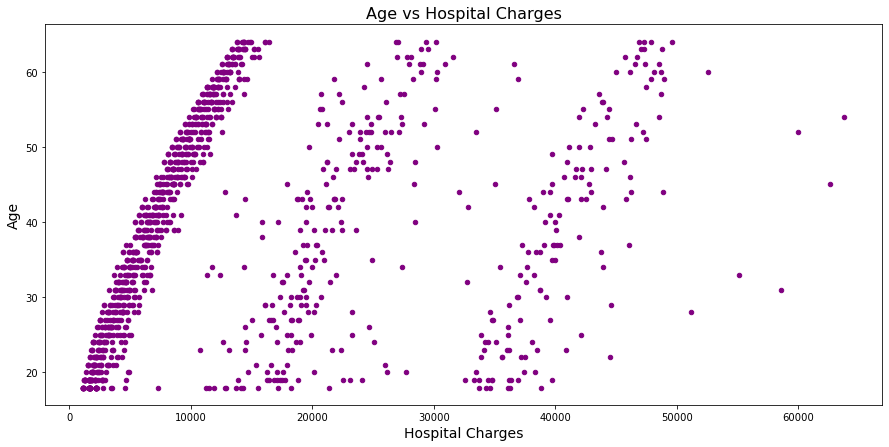

In [23]:
# Using magic of pandas scatter() function along with implicit figure size of 15 X 7 inches
insurance_df.plot.scatter(x='charges', y='age', color='purple', figsize=[15, 7])

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Hospital Charges', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Age', size=14)

# Labelling title with a custom label and size of 14
plt.title(label='Age vs Hospital Charges', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()



#### Observations
- As the age of person increases expenditure on health alos increases
- Person aged between 30-55 are having maxium outlier of having more hospital charges 5times the normal charges]

<a name = Section84></a>
### **8.4 Which region Insurance is bearing maximum amount of claims?**

In [24]:
insurance_df['region'].nunique()


4

In [25]:
region_df = insurance_df.region.value_counts()
region_df

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

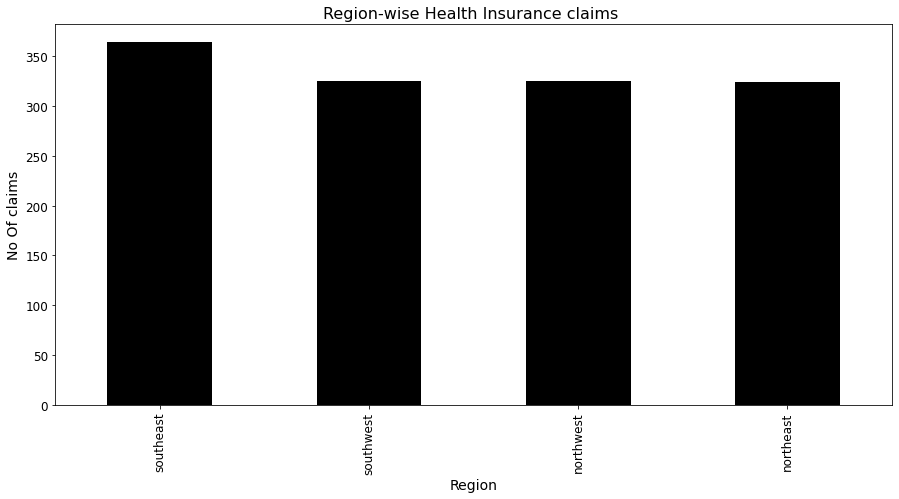

In [26]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])

# Using magic of pandas kde() function
region_df.plot.bar(color='black')

# Changing x-ticks ranging from -200 to 800 with step size of 50 and label size of 12
plt.xticks(ticks= None, size=12)

# Changing y-ticks labels size to 12
plt.yticks(size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Region', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='No Of claims', size=14)

# Labelling title with a custom label and size of 14
plt.title(label='Region-wise Health Insurance claims ', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()

#### Observations
- All the regions are having approx the same no of claims.
- as per graph Southeast region are having slightly more no of Claims then the other.

<a name = Section85></a>
### **8.5 What is Relationship between age and no of childreen ?**

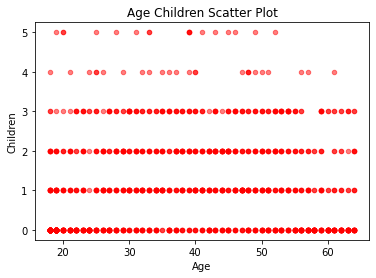

In [27]:
insurance_df.plot(kind='scatter', x='age', y='children',alpha = 0.5,color = 'red')
plt.xlabel('Age')              
plt.ylabel('Children')
plt.title('Age Children Scatter Plot')  
plt.show()


#### Observations
- By scatter plot, it can be said that people who are younger than 40 have more child than people who are older than 40.

<a name = Section86></a>
### **8.6 Male & Female Hospital Charges?**

In [28]:
data1=insurance_df['sex']=='female'
data_female=insurance_df[data1]
data2=insurance_df['sex']=='male'
data_male=insurance_df[data2]

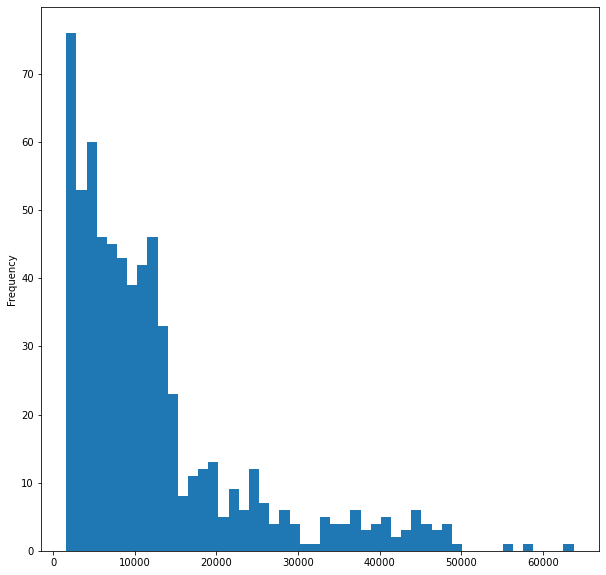

In [29]:
data_female.charges.plot(kind='hist', bins=50, figsize=(10,10))
plt.show()


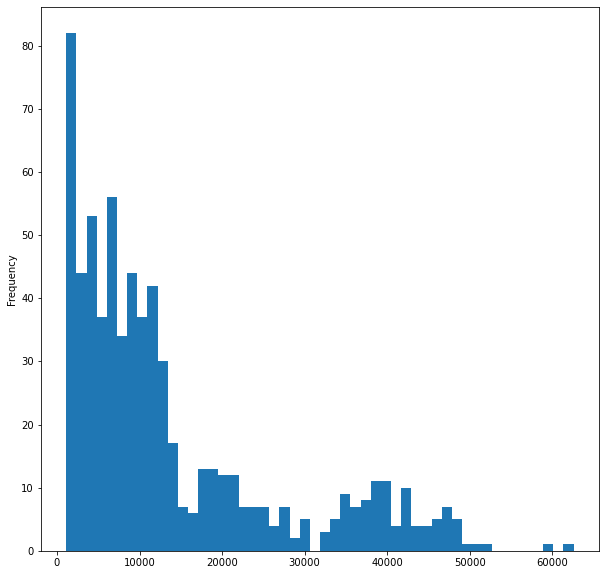

In [30]:
data_male.charges.plot(kind='hist', bins=50, figsize=(10,10))
plt.show()

#### Observations
- From the Graph We can said that female's charges less than male's charges between 20000 and 50000.

<a name = Section87></a>
### **8.7  Who Smokes more Father or Mom ?

In [31]:
data3=(insurance_df['sex']=='male') & (insurance_df['smoker']== 1) & (insurance_df['children']>0)
insurance_df[data3].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 29 to 1307
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       97 non-null     int64  
 1   sex       97 non-null     object 
 2   bmi       97 non-null     float64
 3   children  97 non-null     int64  
 4   smoker    97 non-null     int64  
 5   region    97 non-null     object 
 6   charges   97 non-null     float64
dtypes: float64(2), int64(3), object(2)
memory usage: 6.1+ KB


In [32]:
data4=(insurance_df['sex']=='female') & (insurance_df['smoker']== 1) & (insurance_df['children']>0)
insurance_df[data4].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 23 to 1323
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       62 non-null     int64  
 1   sex       62 non-null     object 
 2   bmi       62 non-null     float64
 3   children  62 non-null     int64  
 4   smoker    62 non-null     int64  
 5   region    62 non-null     object 
 6   charges   62 non-null     float64
dtypes: float64(2), int64(3), object(2)
memory usage: 3.9+ KB


#### Observations
- Clearly From data we got to know that Mom Smoker are only 62 While Father Smoker are 97

<a name = Section88></a>
### **8.8 What is the average Bmi and overall we have high bmi or low ?**

<Figure size 864x720 with 0 Axes>

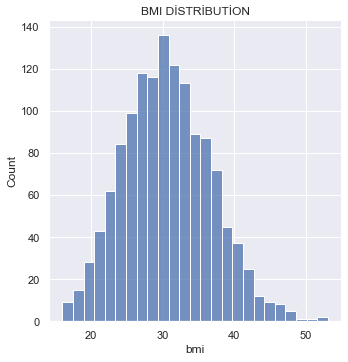

In [33]:
sns.set()
plt.figure(figsize = (12,10))
sns.displot(insurance_df["bmi"])
plt.title("BMI DİSTRİBUTİON")
plt.show()

#### Observations
- The dataset and the researchs about body mass index are telling us that, the majority of the people in this data are overweight.And there is a large amount of people on the obese range...That can be an important thing.It could be increase the insurance price.
- (below 18.5 – you're in the underweight range)
- (between 18.5 and 24.9 – you're in the healthy weight range)
- (between 25 and 29.9 – you're in the overweight range)
- (between 30 and 39.9 – you're in the obese range)

<a name = Section9></a>

---
# **9. Summary and Conclusion**
---
---

- **<h4>Conclusion</h4>**

  - The EDA helps us know that total of **227 Smokers Male and female combined** .
  - Individaul **medical cost** Billed by insurence is **more for smokers** then that of non smokers.
  - Younger people **ess then 40 yr** are having **more children**. 
  - Insurance Company should **encourage non smokers** and **give then some discounts** on renewal to encoure them.
  - From data we got to know that **father Smokers** are **more** **then** that of **Mother Smokers**.
  - As the **age of person increases** the **medical cost Beared by insurence is more**.
  - As per data most of the person are obese and it could be increase the insurance price.  
  

-  **<h4>Actionable Insights</h4>**

  - There should be an **awareness program** about health and its effects to encourage people to but health insurance.

  - **Smokers** should have been **charges more premium** as Their **chances** of **getting ill are more** and insurace have to bear more charges for them
  
  - Smokers should have been given a **special package of quiting smoking** package along with normal healthcare package as **combo** offer.
  - It is **good to give** some discount to the current premium chaged by insurance if they quit smoking.
  - Younger generation should be aware about having 2 child policy as it will minimise the expences on health care.
  - People in age group of 30-50 should be given personalised recomendation based on thir daily routine to follow a healthy life style as this age group of people have shown some of the most expensive healthcare treatments.